# Regresión Lineal y Clasificación con el Dataset Iris
### **Autores:**

- Andrés Felipe Díaz Campos
Basado en el dataset Iris (Ronald A. Fisher, 1936)

Uso de librerías de Python: NumPy, Pandas, Matplotlib, scikit-learn

 ## **Introducción** 

- El dataset Iris es uno de los más utilizados en aprendizaje automático. Contiene 150 registros de flores de tres especies distintas: Setosa,   Versicolor y Virginica. Cada registro incluye 4 características: largo y ancho del sépalo, largo y ancho del pétalo.

- En este trabajo utilizamos regresión lineal en dos formas diferentes:

1. Regresión lineal pura: para modelar la relación entre dos variables continuas.

2. Clasificación con regresión lineal: para diferenciar especies de flores, aproximando el problema como un modelo de predicción de clases.

In [74]:
# Paso 1: Importar librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.datasets import load_iris



## Selección y visualización de ejemplos del dataset Iris

En este bloque se realiza la **selección y visualización de ejemplos del dataset Iris**:

1. Se importa el dataset Iris desde `sklearn.datasets` y se cargan las **características** (`X`) y la **variable objetivo** (`y`).
2. Se crea un **DataFrame de pandas** con las características y se agrega la columna `target` que indica la especie de cada flor de forma numérica:
   - 0 = setosa
   - 1 = versicolor
   - 2 = virginica
3. para mostrar en el informe, usando filtros sobre la columna `target`.
4. Se combinan estos ejemplos en un **nuevo DataFrame (df_examples)** y se **resetea el índice** para mantener un formato limpio.
5. Se configuran opciones de `pandas` para que la tabla se muestre **completa, centrada y con dos decimales**, mejorando la legibilidad.
6. Finalmente, se imprime el DataFrame resultante, mostrando **3 muestras representativas de cada especie**, lo que facilita la comprensión del dataset.




In [75]:

# Cargar dataset Iris
iris = load_iris()
X = iris.data
y = iris.target
columns = iris.feature_names

# Crear DataFrame
df = pd.DataFrame(X, columns=columns)
df["target"] = y  # Mantener solo target numérico

# Seleccionar 3 ejemplos de cada especie
df_examples = pd.concat([
    df[df["target"] == 0].head(3),
    df[df["target"] == 1].head(3),
    df[df["target"] == 2].head(3)
])

# Resetear índice para que se vea limpio
df_examples = df_examples.reset_index(drop=True)

# Mostrar la tabla ordenada en consola
pd.set_option('display.max_columns', None)  # Mostrar todas las columnas
pd.set_option('display.width', 1000)        # Ajustar ancho de la tabla
pd.set_option('display.colheader_justify', 'center')  # Centrar los headers
pd.set_option('display.precision', 2)       # Mostrar 2 decimales

print(df_examples)


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  target
0         5.1                3.5               1.4                0.2           0  
1         4.9                3.0               1.4                0.2           0  
2         4.7                3.2               1.3                0.2           0  
3         7.0                3.2               4.7                1.4           1  
4         6.4                3.2               4.5                1.5           1  
5         6.9                3.1               4.9                1.5           1  
6         6.3                3.3               6.0                2.5           2  
7         5.8                2.7               5.1                1.9           2  
8         7.1                3.0               5.9                2.1           2  


## División del dataset Iris en entrenamiento y prueba

En este bloque de código se realiza la **carga y preparación del dataset Iris** para su posterior análisis:

1. Se importan las librerías necesarias:
   - `pandas` para manejar y visualizar los datos en forma de DataFrames.
   - `load_iris` de `sklearn.datasets` para cargar el dataset Iris.
   - `train_test_split` de `sklearn.model_selection` para dividir los datos en conjuntos de entrenamiento y prueba.

2. Se carga el dataset Iris y se separan las **características** (`X`) y la **variable objetivo** (`y`). Además, se obtienen los nombres de las columnas (`columns`).

3. Se divide el dataset en dos partes:
   - **70%** para entrenamiento (`X_train`, `y_train`)
   - **30%** para prueba (`X_test`, `y_test`)  
   El parámetro `random_state=42` asegura que la división sea **reproducible**.

4. Se crean **DataFrames de pandas** (`df_X_train` y `df_X_test`) para mostrar de manera clara algunas filas de los conjuntos de entrenamiento y prueba.

5. Finalmente, se imprime:
   - Un **mini DataFrame** con las primeras 5 filas de `X_train` y `X_test` para ilustrar los datos.
   - La **cantidad de muestras** en cada conjunto, permitiendo verificar que la división se realizó correctamente.



In [64]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Cargar dataset Iris
iris = load_iris()
X = iris.data
y = iris.target
columns = iris.feature_names

# División del dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Crear DataFrames para mostrar en el informe
df_X_train = pd.DataFrame(X_train, columns=columns)
df_X_test = pd.DataFrame(X_test, columns=columns)

# Mostrar primeras 5 filas de cada conjunto
print("Mini DataFrame de X_train:")
print(df_X_train.head(), "\n")

print("Mini DataFrame de X_test:")
print(df_X_test.head())

# Mostrar la cantidad de muestras en cada grupo
print("Tamaño del conjunto de entrenamiento:", X_train.shape[0])
print("Tamaño del conjunto de prueba:", X_test.shape[0])



Mini DataFrame de X_train:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.5               2.4                3.7               1.0
1                6.3               2.8                5.1               1.5
2                6.4               3.1                5.5               1.8
3                6.6               3.0                4.4               1.4
4                7.2               3.6                6.1               2.5 

Mini DataFrame de X_test:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                6.1               2.8                4.7               1.2
1                5.7               3.8                1.7               0.3
2                7.7               2.6                6.9               2.3
3                6.0               2.9                4.5               1.5
4                6.8               2.8                4.8               1.4
Tamaño del conjunto de entrenamie

##Entrenamiento y predicción con Regresión Lineal

En este paso se entrena el **modelo de regresión lineal** utilizando los datos de entrenamiento (`X_train`, `y_train`).  
Una vez entrenado, el modelo se usa para **predecir la especie de flores** con los datos de prueba (`X_test`).  

El modelo devuelve valores continuos, pero como necesitamos **clases enteras (0, 1, 2)** que representen las especies de Iris, se redondean los resultados (`np.round`) para convertirlos en categorías:  

- **0 → Setosa**  
- **1 → Versicolor**  
- **2 → Virginica**  

Luego, se muestran las primeras 10 predicciones en una tabla donde aparece la clase numérica y el nombre de la especie asignada.  

 En conclusión:  
Esta parte del código se utiliza para **entrenar el modelo, generar predicciones y traducirlas a especies de flores**, lo que permite comprobar de manera clara cómo está funcionando el modelo.  


In [57]:

# Paso 4: Entrenamiento y predicción con Regresión Lineal

from sklearn.linear_model import LinearRegression


# 1. Crear el modelo
model = LinearRegression()

# 2. Entrenar con los datos de entrenamiento
model.fit(X_train, y_train)

# 3. Realizar predicciones sobre los datos de prueba
y_pred = model.predict(X_test)

# 4. Redondear a enteros para obtener las clases (0 = Setosa, 1 = Versicolor, 2 = Virginica)
y_pred_class = np.round(y_pred).astype(int)

# 5. Mostrar las primeras 10 predicciones de forma más clara
# Crear un DataFrame con predicciones y sus nombres de especie
species_map = {0: "Setosa", 1: "Versicolor", 2: "Virginica"}

pred_df = pd.DataFrame({
    "Predicción (Clase)": y_pred_class[:10],
    "Especie asignada": [species_map[i] for i in y_pred_class[:10]]
})

print(" Primeras 10 predicciones del modelo:\n")
print(pred_df.to_string(index=False))
print("Predicciones:", y_pred_class[:10])


 Primeras 10 predicciones del modelo:

 Predicción (Clase) Especie asignada
                  1       Versicolor
                  0           Setosa
                  2        Virginica
                  1       Versicolor
                  1       Versicolor
                  0           Setosa
                  1       Versicolor
                  2        Virginica
                  1       Versicolor
                  1       Versicolor
Predicciones: [1 0 2 1 1 0 1 2 1 1]


In [47]:
# Paso 5: Evaluación del modelo
# Calcular métricas
acc = accuracy_score(y_test, y_pred_class)
cm = confusion_matrix(y_test, y_pred_class)

# Mostrar accuracy
print("Accuracy:", round(acc, 3))

# Convertir matriz de confusión a DataFrame
cm_df = pd.DataFrame(cm, 
                     index=["Setosa (Real)", "Versicolor (Real)", "Virginica (Real)"],
                     columns=["Setosa (Pred)", "Versicolor (Pred)", "Virginica (Pred)"])

print("\nMatriz de confusión:")
print(cm_df)


Accuracy: 1.0

Matriz de confusión:
                   Setosa (Pred)  Versicolor (Pred)  Virginica (Pred)
Setosa (Real)                 19                  0                 0
Versicolor (Real)              0                 13                 0
Virginica (Real)               0                  0                13


##  ¿Por qué usamos la matriz de confusión?

La **precisión (Accuracy)** solo nos da un número general del desempeño del modelo.  

La **matriz de confusión** nos permite ver en detalle dónde se equivoca el modelo:  
-  Cuántos aciertos tiene en cada clase.  
-  Cuáles clases confunde entre sí.  

Es muy útil cuando trabajamos con varios tipos de flores (**Setosa, Versicolor y Virginica**), porque podemos identificar qué especies el modelo clasifica peor.  



###  En conclusión:
- **Accuracy** = resumen global.  
- **Matriz de confusión** = análisis detallado por clase.  


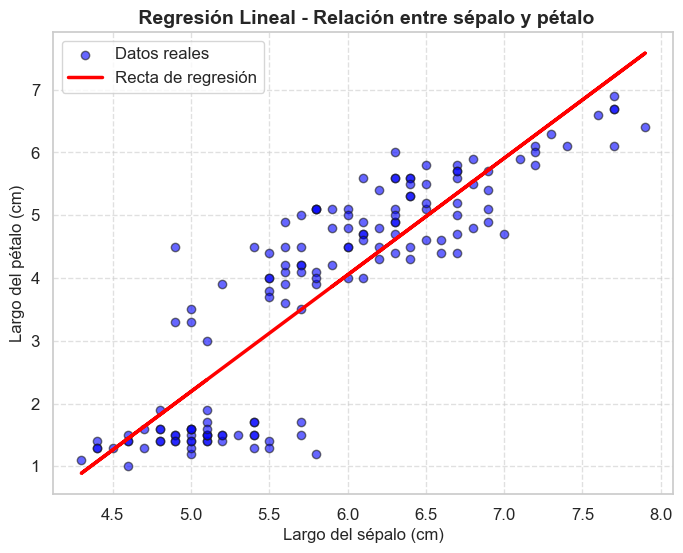

Coeficiente(m) (pendiente ): 1.858
Intercepto (b) (ordenada en el origen): -7.101


In [48]:
# Crear la gráfica
plt.figure(figsize=(8, 6))  # Ajustar tamaño

# Puntos reales
plt.scatter(X, y, color="blue", alpha=0.6, edgecolors="k", label="Datos reales")

# Recta de regresión
plt.plot(X, y_pred, color="red", linewidth=2.5, label="Recta de regresión")

# Mejoras visuales
plt.xlabel("Largo del sépalo (cm)", fontsize=12)
plt.ylabel("Largo del pétalo (cm)", fontsize=12)
plt.title(" Regresión Lineal - Relación entre sépalo y pétalo", fontsize=14, fontweight="bold")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()
# ======================
# Mostrar coeficientes
# ======================
print("Coeficiente(m) (pendiente ):", round(model.coef_[0], 3))
print("Intercepto (b) (ordenada en el origen):", round(model.intercept_, 3))


# Explicación de la gráfica de Regresión Lineal (Dataset Iris)

La siguiente gráfica representa el resultado de aplicar **regresión lineal simple** al dataset **Iris**, relacionando el **largo del sépalo (cm)** con el **largo del pétalo (cm)**.


## Elementos de la gráfica

1. **Datos reales (azules con borde negro):**  
   Los puntos dispersos muestran las observaciones reales del dataset.  
   - Eje X → Largo del sépalo (cm)  
   - Eje Y → Largo del pétalo (cm)  
   - Nos permiten ver cómo cambia el pétalo en función del sépalo.

2. **Recta de regresión (línea roja):**  
   La línea roja corresponde al modelo de **regresión lineal** entrenado con los datos.  
   Se expresa con la ecuación:

   \[
              y^​=m⋅x+b
   \]

   Donde:  
   - \( m \) = pendiente → cuánto crece el pétalo por cada cm adicional del sépalo.  
   - \( b \) = intercepto → valor estimado del pétalo cuando el sépalo es 0 (valor teórico).  

## Interpretación

- La pendiente indica que **a mayor largo del sépalo, el largo del pétalo también tiende a aumentar**.  
- El intercepto, aunque no tenga un significado biológico directo, es importante para la ecuación matemática del modelo.  
- La recta no pasa por todos los puntos, pero refleja la **tendencia central** de los datos.


## Conclusión

La gráfica muestra que existe una **relación lineal positiva** entre el largo del sépalo y el largo del pétalo en las flores del dataset Iris.  
El modelo de regresión lineal permite cuantificar esa relación y visualizarla de manera clara con la línea roja.

